In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('SampleData.csv')

In [3]:
# Adjust the feature names based on your dataset
X = df[['feature1', 'feature2']]

In [4]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn

In [27]:
# Initialize DBSCAN with specified epsilon and min_samples parameters
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.5, min_samples=200)
# Fit the model to the scaled data
dbscan.fit(X_scaled)

DBSCAN(min_samples=200)

In [28]:
#Obtain cluster labels from the DBSCAN model
labels = dbscan.labels_
# Add cluster labels back to the original dataframe for visualization
df['cluster'] = labels

Text(0, 0.5, 'Feature 2')

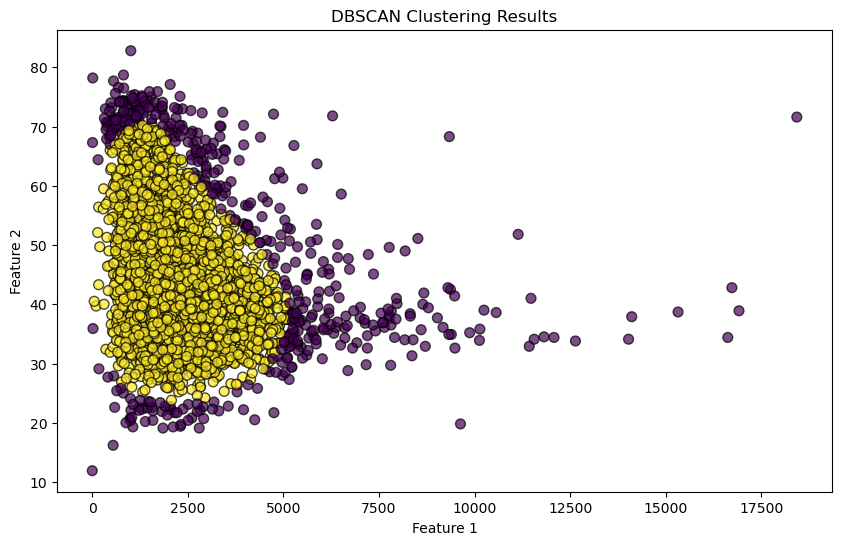

In [29]:
plt.figure(figsize=(10, 6))
# Scatter plot of the data points, colored by cluster labels
# Noise points are colored in black (label = -1)
plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7, label='Cluster Label')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

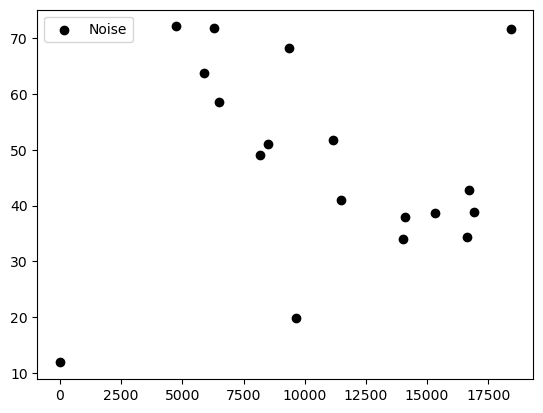

In [8]:
# Annotate noise points
noise = df[df['cluster'] == -1]
plt.scatter(noise['feature1'], noise['feature2'], color='black', label='Noise')
plt.legend()
plt.show()